<a href="https://colab.research.google.com/github/luizpramos/data_science/blob/master/Analisando_os_Dados_do_Airbnb_Cidade_NY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="50%" src="https://www.conexaoparis.com.br/wp-content/uploads/2019/08/nova-iorque-e1564657966489.jpg">



# Análise dos Dados do Airbnb da cidade de Nova York

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.



<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>



## Onde conseguir os dados do Airbnb?

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


Para esta análise escolhemos o arquivo [`listings.csv`](http://data.insideairbnb.com/united-states/ny/new-york-city/2020-05-06/visualisations/listings.csv) da cidade de Nova York.





In [0]:
# importando as bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-05-06/visualisations/listings.csv")

## Análise dos Dados##
Neste primeiro momento vamos entender as variáveis do nosso banco de dados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - região do bairro
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar o nosso *dataset*, analisando as 5 primeiras entradas e as 5 últimas.

In [0]:
# mostrar as 5 primeiras entradas
df.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.38,2,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,318,2020-04-26,4.66,1,261
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.38,1,365


In [0]:
# mostrar as 5 últimas entradas
df.tail(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
50241,43366319,★☆Sunnyside☆★ Locals' favorite neighbor for li...,200239515,Shogo,Queens,Sunnyside,40.73816,-73.92574,Private room,29,28,0,NaN,NaN,35,54
50242,43366369,★☆Sunnyside☆★ Locals favorite neighbor for living,19303369,Hiroki,Queens,Sunnyside,40.73846,-73.92761,Private room,35,28,0,NaN,NaN,69,54
50243,43366411,★☆Sunnyside☆★ Locals' favorite neighbor for li...,19303369,Hiroki,Queens,Sunnyside,40.73936,-73.92748,Private room,29,28,0,NaN,NaN,69,54
50244,43366638,★☆Sunnyside☆★ Locals favorite neighbor for living,204704622,Momoyo,Queens,Sunnyside,40.73939,-73.92766,Private room,35,28,0,NaN,NaN,46,54
50245,43366674,★☆Sunnyside☆★ Locals favorite neighbor for living,204704622,Momoyo,Queens,Sunnyside,40.73978,-73.92784,Private room,29,28,0,NaN,NaN,46,54


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv. Há uma versão mais completa com 35847 entradas e 106 variáveis (listings.csv.gz).

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 50246
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 21,95% das linhas.
* As variáveis `name` e `host_name` têm, respectivamente, 0,03%  e 0,02% de valores nulos nas linhas.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.219520
last_review                       0.219520
name                              0.000358
host_name                         0.000219
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, iremos plotar o histograma.

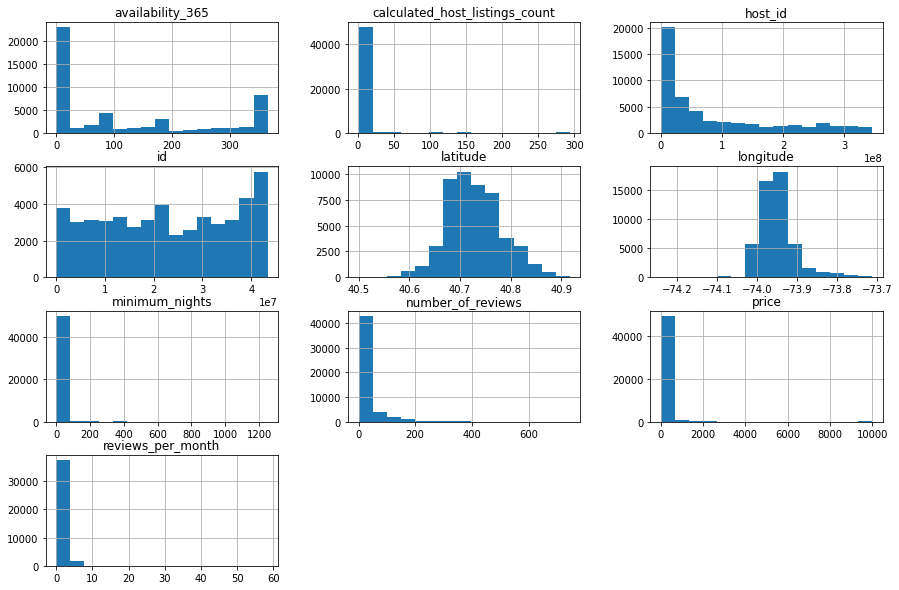

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights`, e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [0]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,50246.000000,50246.000000,50246.000000,39216.000000,50246.000000,50246.000000
mean,163.130777,7.912968,24.410978,1.091541,7.046292,121.786530
std,421.687803,21.472286,48.609159,1.425768,28.428846,140.634991
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,68.000000,1.000000,1.000000,0.160000,1.000000,0.000000
50%,104.000000,3.000000,5.000000,0.510000,1.000000,65.000000
75%,175.000000,5.000000,24.000000,1.570000,2.000000,249.000000
max,10000.000000,1250.000000,746.000000,58.430000,294.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 175, porém seu valor máximo é 10000 e o valor mínimo é zero (Ebaaa, diária de graça, só que não).
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.
* Em todas as variáveis o desvio padrão é maior que a média, o que indica alta dispersão.

#### Boxplot para minimum_nights


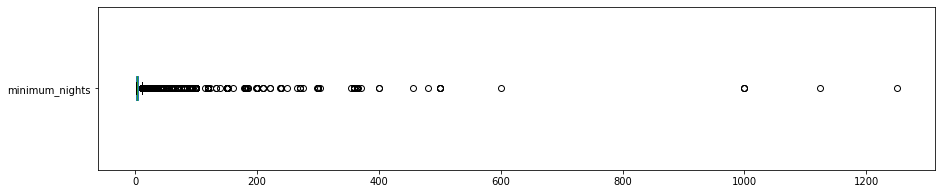

minimum_nights: valores acima de 30:
772 entradas
1.5364%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

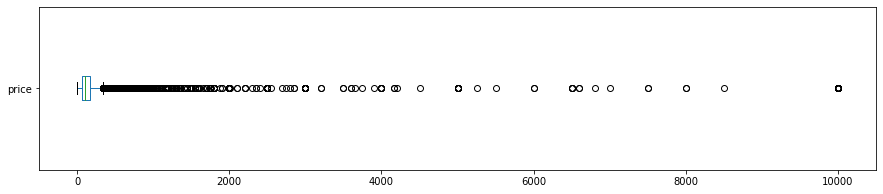


price: valores acima de 500
1139 entradas
2.2668%


In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 500 para price
print("\nprice: valores acima de 500")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

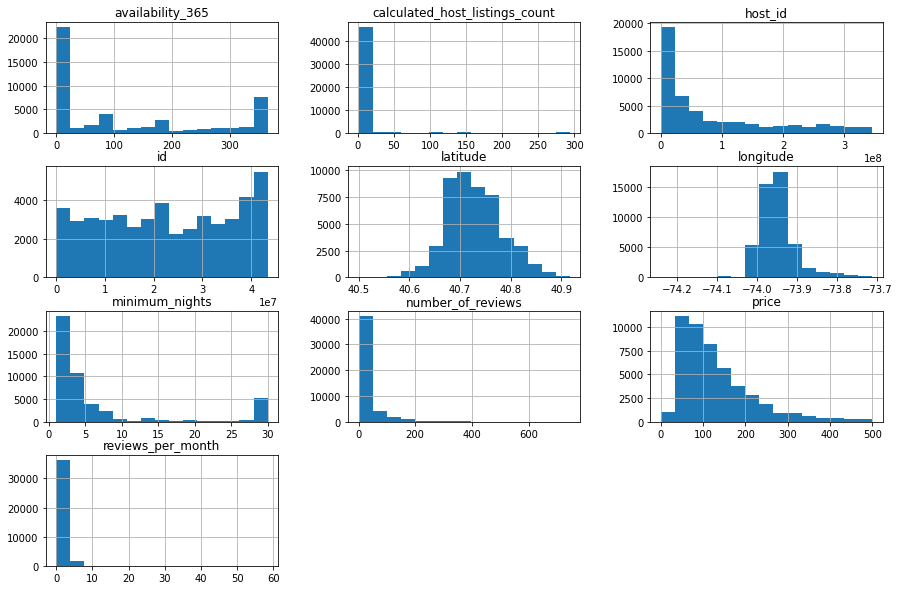

In [0]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.051057,-0.042916,-0.039876,0.086945,0.076667
minimum_nights,0.051057,1.000000,-0.143285,-0.179797,0.415071,0.259925
number_of_reviews,-0.042916,-0.143285,1.000000,0.700806,-0.081348,0.194182
reviews_per_month,-0.039876,-0.179797,0.700806,1.000000,-0.064361,0.216424
calculated_host_listings_count,0.086945,0.415071,-0.081348,-0.064361,1.000000,0.172987
availability_365,0.076667,0.259925,0.194182,0.216424,0.172987,1.000000


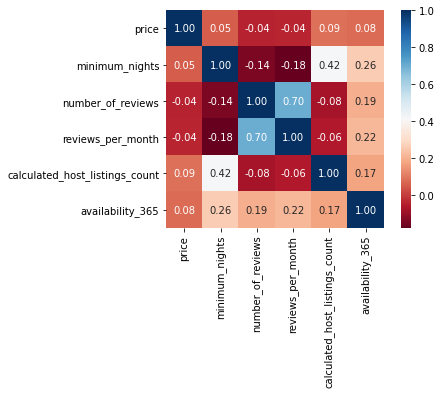

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb em NY?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    24703
Private room       22157
Shared room         1113
Hotel room           400
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.510677
Private room       0.458045
Shared room        0.023009
Hotel room         0.008269
Name: room_type, dtype: float64

### **Q6. Qual o tipo de imóvel mais caro de NY?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar o tipo de locação (*room_type*) a partir do preço de locação.


In [0]:
# ver preços por região dos bairros, na média
df_clean.groupby(['room_type']).price.mean().sort_values(ascending=False)[:10]

room_type
Hotel room         187.060000
Entire home/apt    174.989232
Private room        80.084759
Shared room         64.640611
Name: price, dtype: float64

### **Q7. Qual a localidade mais cara de NY?**

Aqui vamos fazer duas comparações.

* Bairros (*neighbourhoods*) a partir do preço de locação;

* Região do bairro (*neighbourhood_group*) a partir do preço de locação.

In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Willowbrook       309.000000
Neponsit          249.666667
Tribeca           240.434524
Holliswood        228.800000
NoHo              228.727273
Spuyten Duyvil    220.333333
Tottenville       209.500000
Breezy Point      209.333333
Midtown           209.059823
Belle Harbor      208.333333
Name: price, dtype: float64

Acima, vemos que bairros afastados como Willowbrook e Neponsit, estão com média de preço superior a de lugares como Midtown, que fica próximo ao  Central Park, Times Square e Broadway.

Uma pessoa que não conhecesse Nova York poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para Willowbrook.

In [0]:
# ver preços por região dos bairros, na média
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10]

neighbourhood_group
Manhattan        158.799887
Brooklyn         112.297467
Staten Island     91.441667
Queens            90.595054
Bronx             84.464286
Name: price, dtype: float64

Veja que Manhattan a região que tem a maior média de preço, que é uma informação consistente.

In [0]:
# ver quantidade de imóveis no Willowbrook
print(df_clean[df_clean.neighbourhood == "Willowbrook"].shape)

# ver a única entrada de Willowbrook
df_clean[df_clean.neighbourhood == "Willowbrook"]

(1, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
29262,27088022,"Bright, Brand NEW, and Spacious, Gorgeous Home",115827173,David,Willowbrook,40.59886,-74.13217,Entire home/apt,309,4,18,2020-03-12,0.84,2,351


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

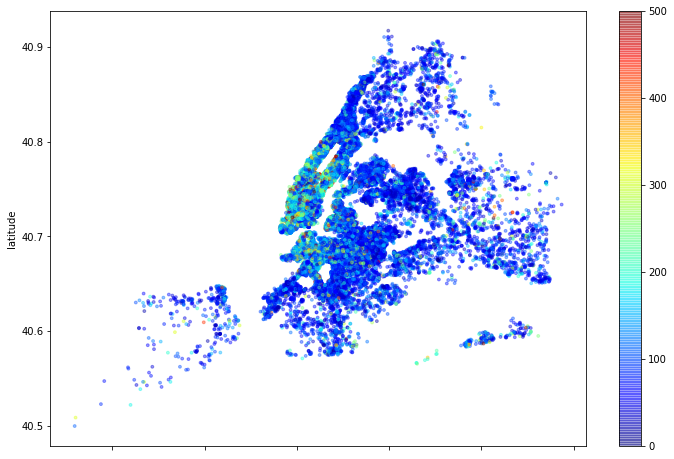

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Mapa da cidade de Nova York.

<img alt="Colaboratory logo" width="65%" src="https://blogs.uai.com.br/diretodenovayork/wp-content/uploads/sites/124/2018/08/Bairros.png">

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
Usando o grupo by podemos descobrir qual a média de noite mínima para cada tipo de hospedagem.

In [0]:
# ver a média da coluna `minimum_nights``
df_clean.groupby(['room_type']).minimum_nights.mean().sort_values(ascending=False)[:10]

room_type
Entire home/apt    7.684816
Shared room        6.011680
Private room       5.047886
Hotel room         2.580000
Name: minimum_nights, dtype: float64

## Conclusões


Foi feita apenas uma análise descritiva na base de dados do Airbnb e percebemos que:

* Existem outliers em algumas das variáveis;

* Quartos de hotéis, em média, são mais caros;

* Algumas localidades com poucos imóveis podem distorcer as informações estatística;

* Apartamentos inteiros exigem, em média, maior número de noites minimas.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.

